In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
boston = tf.keras.datasets.boston_housing

In [ ]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [ ]:
boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split= 0.2 , seed=42)

In [ ]:
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
sc =StandardScaler()

In [ ]:
x_trained_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

y_train_scaled = sc.fit_transform(y_train.reshape(-1,1))
y_test_scaled = sc.transform(y_test.reshape(-1,1))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,),name='input layer'),
    tf.keras.layers.Dense(100,name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50,name='hidden-layer-4'),
    tf.keras.layers.Dense(1,name='output-layer'),
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)               │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-3 (BatchNormalization)  │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-4 (Dense)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [ ]:
history = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step - loss: 554.7328 - mae: 22.1050 - val_loss: 2256.4565 - val_mae: 44.5663
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 559.8202 - mae: 22.2060 - val_loss: 987.0950 - val_mae: 29.7070
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 544.8445 - mae: 21.8511 - val_loss: 758.2772 - val_mae: 26.3844
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 485.1041 - mae: 20.8139 - val_loss: 738.0740 - val_mae: 26.0868
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 456.9078 - mae: 20.1994 - val_loss: 601.1090 - val_mae: 23.6293
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 360.8361 - mae: 18.0634 - val_loss: 497.9829 - val_mae: 21.4693
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 314.0428 - mae: 16.7160 - val_loss: 509.9688 - val_mae: 21.7444
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 230.4003 - mae: 13.7695 - val_loss: 283.1428 - val_mae: 15.6081
Epoch 9/20
13/13 ━━

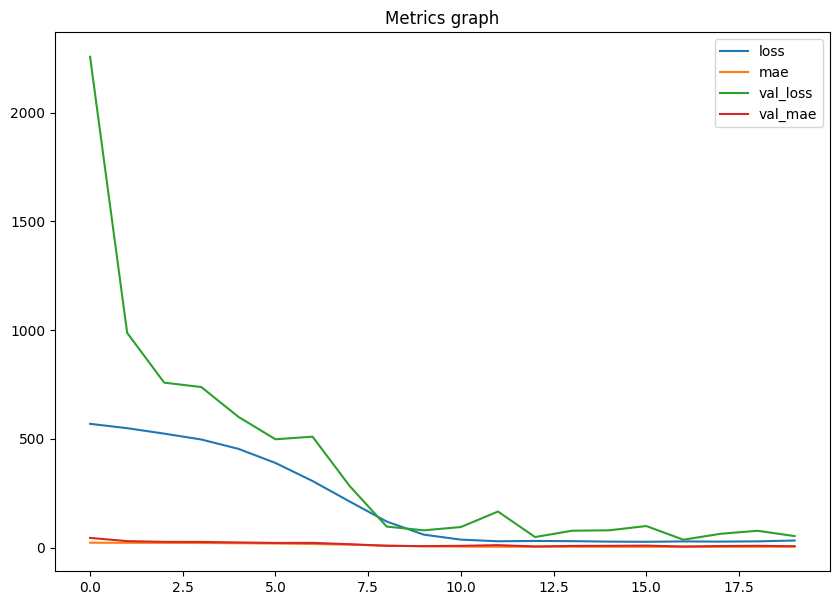

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [ ]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


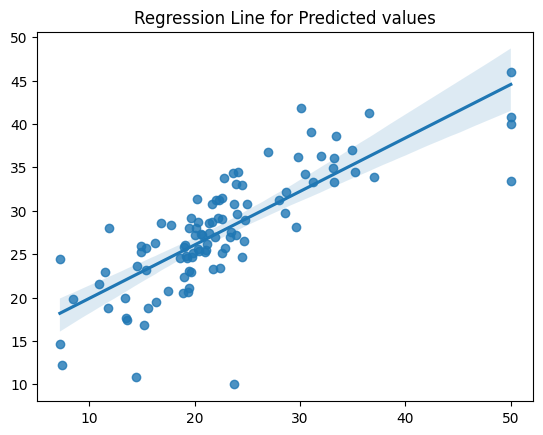

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [ ]:
def regression_metrics_display(y_test,y_pred):
    print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
    print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [ ]:
regression_metrics_display(y_test, y_pred)

MAE is 6.278344023461434
MSE is 52.857042405252365
R2 score is 0.25764678379503125
